# Simulation experiment for detection thresholds for variant calling

This notebook is to get detection thresholds for the limit of the variant calling based on: 

1. Read depth
2. Error rate
3. Number of mutations

The data from this comes from: https://pubs.acs.org/doi/10.1021/acscentsci.7b00548 Ape AGW


In [1]:
import pandas as pd
# Visualisation things to make the figures look nice
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sciutil import SciUtil


data_dir = 'ePCR_data/'
fig_dir = 'ePCR_figures/'


plt.rcParams['svg.fonttype'] = 'none'
axis_line_width = 1.0
axis_font_size = 12
title_font_size = 12
label_font_size = 10
figsize = (2.5, 3) # Figure size
font = 'Arial'
style = 'ticks'
font_family = 'sans-serif'

# Create a figure with 2x2 subplots
cmap = 'viridis'
palette = sns.color_palette("viridis_r", as_cmap=True)
sns.set_palette(cmap)

sns.set(rc={'figure.figsize': figsize, 'font.family': font_family,
            'font.sans-serif': font, 'font.size': label_font_size}, style=style)
sns.set_style("ticks")

def set_ax_params(ax):
    ax.tick_params(direction='out', length=2, width=axis_line_width)
    ax.spines['bottom'].set_linewidth(axis_line_width)
    ax.spines['top'].set_linewidth(0)
    ax.spines['left'].set_linewidth(axis_line_width)
    ax.spines['right'].set_linewidth(0)
    ax.tick_params(labelsize=axis_font_size)
    ax.tick_params(axis='x', which='major', pad=2.0)
    ax.tick_params(axis='y', which='major', pad=2.0)
    ax.tick_params(labelsize=label_font_size)


u = SciUtil()

# Generate mutations on a "real" sequence
# Decided to choose tauD from Ecoli K12
parent_sequence_aa = 'MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKACDVLKDQVDEILDLAGGWVASNEHLIYYFSNPDTGEPIKEYLERVRARFGAWILDTTCRDYNREWLDYQYEVGLRHHRSKKGVTDGVRTVPHIPLRYLIAWIYPITATIKPFLAKKGGSPEDIEGMYNAWFKSVVLQVAIWSHPYTKENDWLEHHHHHH*'

parent_sequence = 'ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGAAGTCACCCATCACGGACCTTGAGTTTGACCTTCTGAAGAAGACTGTCATGTTAGGTGAAAAGGACGTAATGTACTTGAAAAAGGCGTGTGACGTTCTGAAAGATCAAGTTGATGAGATCCTTGACTTGGCGGGTGGTTGGGTAGCATCAAATGAGCATTTGATTTATTACTTCTCCAATCCGGATACAGGAGAGCCTATTAAGGAATACCTGGAACGTGTACGCGCTCGCTTTGGAGCCTGGATTCTGGACACTACCTGCCGCGACTATAACCGTGAATGGTTAGACTACCAGTACGAAGTTGGGCTTCGTCATCACCGTTCAAAGAAAGGGGTCACAGACGGAGTACGCACCGTGCCCCATATCCCACTTCGTTATCTTATCGCATGGATCTATCCTATCACCGCCACTATCAAGCCATTTTTGGCTAAGAAAGGTGGCTCTCCGGAAGACATCGAAGGGATGTACAACGCTTGGTTCAAGTCTGTAGTTTTACAAGTTGCCATCTGGTCACACCCTTATACTAAGGAGAATGACTGGCTCGAGCACCACCACCACCACCACTGA'

# Introduce mutations at a given frequency and an error rate

Test setup:

Change to 0.1 - 5% 0.2% step size. 

1. For number of mutations from 1 to the sequence length test mutating each one and correlate this to the p value
2. For sequencing error rates from 0 to 100% make sequences ranging with this and see what the results are for the p value and the error
3. For different sequence lengths also check how sequence length corresponds to the pvalue

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
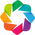

In [2]:
from minION import *
from tqdm import tqdm

label = 'ApeAGW'

In [3]:
significance = -1*np.log10(0.001)

## Experiment 1: Varying the sequencing error rate for a single mutation

In [29]:

experiment_df = pd.read_csv(f'{data_dir}Experiment1.csv')
experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df['Error rate'] = [int(c.split('_')[-1])/100.0 for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(v.split('_')) for v in experiment_df['Variant'].values]
experiment_df['# Mutations'] = [f'<30' if v < 30 else f'>=30' for v in experiment_df['# Mutations']]
experiment_df = experiment_df.reset_index()
ax = sns.scatterplot(experiment_df, x='frequency', y='-log10(P.adj)', hue='Error rate', palette='viridis', 
                    style="# Mutations", style_order=['<30', '>=30'], s=20)
set_ax_params(ax)
plt.xlabel('Mutation frequency')
plt.ylabel('-log10(padj)')
plt.title('Sequencing error', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.savefig(f'{fig_dir}Experiment1_{label}.svg')
plt.show()

/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_14540/2510296329.py:2: RuntimeWarning: divide by zero encountered in log10
  experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)


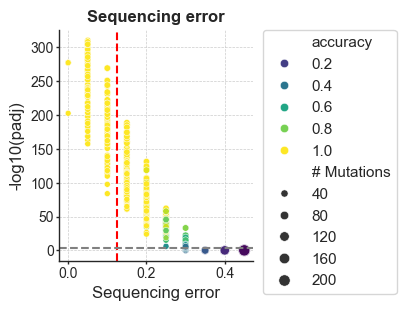

In [4]:

experiment_df = pd.read_csv(f'{data_dir}Experiment1.csv')
experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df['Error rate'] = [int(c.split('_')[-1])/100.0 for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(v.split('_')) for v in experiment_df['Variant'].values]
#experiment_df['# Mutations'] = [f'{v}' if v < 5 else f'>=5' for v in experiment_df['# Mutations']]
experiment_df = experiment_df.reset_index()
ax = sns.scatterplot(experiment_df, x='Error rate', y='-log10(P.adj)', hue='accuracy', palette='viridis', 
                     size="# Mutations")
set_ax_params(ax)
plt.xlabel('Sequencing error')
plt.ylabel('-log10(padj)')
plt.title('Sequencing error', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axvline(x = 0.125, color = 'red', linestyle = '--') #axis='y', 

plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.savefig(f'{fig_dir}Experiment1_version2_{label}.svg')
plt.show()

In [31]:
experiment_df

## Experiment 2: varying read depth and it's effect on significance

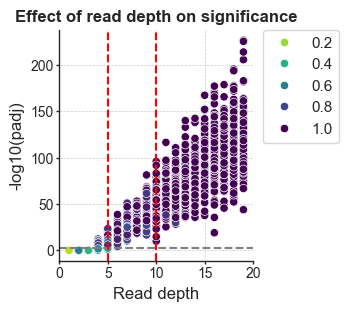

In [13]:
experiment_df = pd.read_csv(f'{data_dir}Experiment2_ReadDepth_{label}.csv')
experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df['Read depth'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(v.split('_')) for v in experiment_df['Variant'].values]
experiment_df = experiment_df.reset_index()
experiment_df.replace([np.inf, -np.inf], 320, inplace=True)
ax = sns.scatterplot(experiment_df, x='Read depth', y='-log10(P.adj)', hue='accuracy', palette='viridis_r')
set_ax_params(ax)
plt.xlim((0, 20))
plt.xlabel('Read depth')
plt.ylabel('-log10(padj)')
plt.title('Effect of read depth on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.axvline(x = 5, color = 'red', linestyle = '--') #axis='y', 
plt.axvline(x = 10, color = 'red', linestyle = '--') #axis='y', 
plt.savefig(f'{fig_dir}Experiment2_{label}.svg')
plt.show()

In [11]:
f5_10 = experiment_df[experiment_df['Read depth'] > 4]
f5_10 = f5_10[f5_10['Read depth'] < 11]
np.mean(f5_10p[

0.9149139686671819

In [12]:
f5_10 = experiment_df[experiment_df['Read depth'] > 10]
np.mean(f5_10['accuracy'].values)

0.9968291146133693

In [18]:
experiment_df = pd.read_csv(f'{data_dir}Experiment2_ReadDepth_{label}.csv')
experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df['Read depth'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(v.split('_')) for v in experiment_df['Variant'].values]
experiment_df = experiment_df.reset_index()
experiment_df.replace([np.inf, -np.inf], 320, inplace=True)

ax = sns.scatterplot(experiment_df, x='Read depth', y='-log10(P.adj)', hue='accuracy', palette='viridis', 
                     size="# Mutations")
set_ax_params(ax)
plt.xlabel('Read depth')
plt.ylabel('-log10(padj)')
plt.xlim((0, 20))
plt.ylim((0, 100))

plt.title('Effect of read depth on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.axvline(x = 5.5, color = 'red', linestyle = '--') #axis='y', 
plt.axvline(x = 10.5, color = 'red', linestyle = '--') #axis='y', 

plt.grid(True, which='major', linestyle='--', linewidth=0.5)

plt.savefig(f'{fig_dir}Experiment2_version2_{label}.svg')
plt.show()

In [17]:
# Get for read depth between 0-5, 6-10, 10-20
for read_depth in range(1, 11):
    u.dp(['Read Depth:', read_depth, np.nanmean(experiment_df[experiment_df['Alignment_count'] == read_depth]['accuracy'].values)])

for read_depth in range(10, 90, 10):
    u.dp(['Read Depth:', read_depth, np.nanmean(experiment_df[experiment_df['Alignment_count'] == read_depth]['accuracy'].values)])


## Experiment 3: effect of sequence length on significance


In [65]:
experiment_df = pd.read_csv(f'{data_dir}Experiment3_{label}.csv')

experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df['Seq length'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(str(v).split('_')) for v in experiment_df['Variant'].values]
#experiment_df['# Mutations'] = [f'{v}' if v < 5 else f'>=5' for v in experiment_df['# Mutations']]
experiment_df = experiment_df.reset_index()
ax = sns.scatterplot(experiment_df, x='frequency', y='-log10(P.adj)', hue='Seq length', palette='Greys', 
                     size="# Mutations")#
set_ax_params(ax)
plt.xlabel('Mutation frequency')
plt.ylabel('-log10(padj)')
plt.title('Effect of sequence length on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.savefig(f'{fig_dir}Experiment3_{label}.svg')
plt.show()

## Experiment 4: effect of frequency cutoff

In [62]:
experiment_df = pd.read_csv(f'{data_dir}Experiment4_{label}.csv')

experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df['Freq'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(v.split('_')) for v in experiment_df['Variant'].values]
experiment_df['# Mutations'] = [f'<20' if v < 20 else f'>=20' for v in experiment_df['# Mutations']]
experiment_df = experiment_df.reset_index()
experiment_df.replace([np.inf, -np.inf], 320, inplace=True)

ax = sns.scatterplot(experiment_df, x='frequency', y='-log10(P.adj)', hue='accuracy', palette='viridis', 
                     style="# Mutations", style_order=['<20', '>=20'], s=20)
set_ax_params(ax)
plt.xlabel('Mutation frequency')
plt.ylabel('-log10(padj)')
plt.title('Effect of frequency cutoff on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.axvline(x = 0.5, color = 'red', linestyle = '--') #axis='y', 
plt.savefig(f'{fig_dir}Experiment4_{label}.svg')
plt.show()

## Experiment 5: ePCR mutation rate

In [63]:
experiment_df = pd.read_csv(f'{data_dir}Experiment5_{label}.csv')
experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df.replace([np.inf, -np.inf], 320, inplace=True)

experiment_df['ePCR'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(str(v).split('_')) for v in experiment_df['Variant'].values]
experiment_df = experiment_df.reset_index()
ax = sns.scatterplot(experiment_df, x='frequency', y='-log10(P.adj)', hue='ePCR', palette='Greys', 
                     size="# Mutations")
set_ax_params(ax)
plt.xlabel('Mutation frequency')
plt.ylabel('-log10(padj)')
plt.title('ePCR effect on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.savefig(f'{fig_dir}Experiment5_{label}.svg')
plt.show()

In [5]:
experiment_df

In [12]:
experiment_df = pd.read_csv(f'{data_dir}Experiment6_{label}.csv')

experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df.replace([np.inf, -np.inf], 320, inplace=True)

experiment_df['mixedWell'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(str(v).split('_')) for v in experiment_df['Variant'].values]
#experiment_df['# Mutations'] = [f'{v}' if v < 5 else f'>=5' for v in experiment_df['# Mutations']]
experiment_df['Mixed Well'] = [c for c in experiment_df['Mixed Well'].values]

experiment_df = experiment_df.reset_index()
ax = sns.scatterplot(experiment_df, x='mixedWell', y='-log10(P.adj)', hue='accuracy', palette='viridis', 
                     #palette=['grey', 'orange'], 
                     size="Mixed Well")#]# , style_order=['1', '2', '3', '4', '>=5'], s=80)
set_ax_params(ax)
plt.xlabel('Mutation frequency')
plt.ylabel('-log10(padj)')
plt.title('Mixed well effect on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.axvline(x = 0.5, color = 'red', linestyle = '--') #axis='y', 

plt.savefig(f'{fig_dir}Experiment6_{label}.svg')
plt.show()

In [43]:
experiment_df = pd.read_csv(f'{data_dir}Experiment6_{label}.csv')

experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df.replace([np.inf, -np.inf], 320, inplace=True)

experiment_df['mixedWell'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(str(v).split('_')) for v in experiment_df['Variant'].values]
#experiment_df['# Mutations'] = [f'{v}' if v < 5 else f'>=5' for v in experiment_df['# Mutations']]
experiment_df['Mixed Well'] = [c for c in experiment_df['Mixed Well'].values]

experiment_df = experiment_df.reset_index()
ax = sns.scatterplot(experiment_df, x='frequency', y='-log10(P.adj)', hue='accuracy', palette='viridis', 
                     size="# Mutations")#]# , style_order=['1', '2', '3', '4', '>=5'], s=80)
set_ax_params(ax)
plt.xlabel('Mutation frequency')
plt.ylabel('-log10(padj)')
plt.title('Mixed well effect on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y = significance, color = 'grey', linestyle = '--') #axis='y', 
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.axvline(x = 0.5, color = 'red', linestyle = '--') #axis='y', 

plt.savefig(f'{fig_dir}Experiment6_version2_{label}.svg')
plt.show()

In [34]:
experiment_df = pd.read_csv(f'{data_dir}Experiment6_{label}.csv')

experiment_df['-log10(P.adj)'] = -1*np.log10(experiment_df['P adj.'].values)
experiment_df.replace([np.inf, -np.inf], 320, inplace=True)

experiment_df['mixedWell'] = [int(c.split('_')[-1]) for c in experiment_df['Plate']]
experiment_df['# Mutations'] = [len(str(v).split('_')) for v in experiment_df['Variant'].values]
#experiment_df['# Mutations'] = [f'{v}' if v < 5 else f'>=5' for v in experiment_df['# Mutations']]
experiment_df['Mixed Well'] = [c for c in experiment_df['Mixed Well'].values]

experiment_df = experiment_df.reset_index()
ax = sns.scatterplot(experiment_df, x='frequency', y='accuracy', hue='Mixed Well', palette=['grey', 'orange'], 
                     size="# Mutations")#]# , style_order=['1', '2', '3', '4', '>=5'], s=80)
set_ax_params(ax)
plt.xlabel('Mutation frequency')
plt.ylabel('Accuracy')
plt.title('Mixed well effect on significance', fontsize=title_font_size, fontweight="bold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.savefig(f'{fig_dir}Experiment6_{label}.svg')
plt.show()